## Plotting time-series

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Read data with a time index
    1.1 Read csv and change date (string) to datetime and set date as index
    
#### 2. Plot time-series data
    2.1 Use indexes of dataframe as x axis values
    
#### 3. Using a time index to zoom in
    3.1 How to pick single record from dataframe
    3.2 Pick range of records to create sub dataframe
    
#### 4. Plotting two variables
    4.1 Create twin axis that share x with existing
    4.2 Plot two variables (each have own y scale)
    
#### 5. Defining a function that plots time-series data
    5.1 Set color of label
    5.2 Set color of ticks
    
#### 6. Using a plotting function 
    6.1 Define function (for one variable)
    6.2 axes, x, y, color, xlabel, ylabel

    
#### 7. Annotating a plot of time-series data
    7.1 Put annotate text on plot
    
#### 8. Plotting time-series: putting it all together
    8.1 Move annotation text
    8.2 Use arrow
    8.3 Change arrow style and color

In [16]:
# 1.1
data = pd.read_csv('data.csv', parse_dates=['date'], index_col='date')
display(data.head(n=2))

,co2,temp
date,,
2010-01-01,5,1.0
2010-01-02,6,1.5


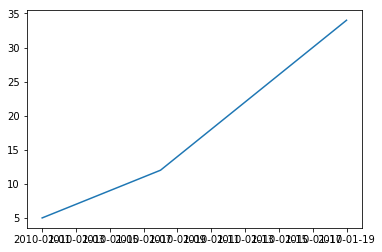

In [20]:
# 2.1
fig, ax = plt.subplots()
ax.plot(data.index, data['co2'])
plt.show()

In [46]:
# 3.1
display(data.loc[[pd.Timestamp('2010-01-02')]])
# 3.2
print(type(data.loc['2010-01-02':'2010-01-5']))

,co2,temp
date,,
2010-01-02,6,1.5


<class 'pandas.core.frame.DataFrame'>


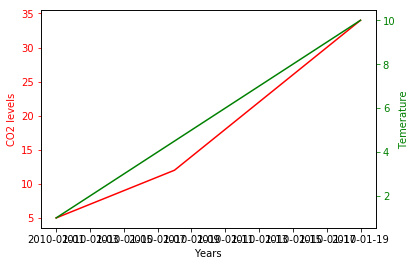

In [59]:
# 4.1, 4.2, 5.1, 5.2
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data.index, data['co2'], color='red')
ax2.plot(data.index, data['temp'], color='green')
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 levels', color='red')
ax2.set_ylabel('Temerature', color='green')
ax1.tick_params('y', colors='red')
ax2.tick_params('y', colors='green')
plt.show()

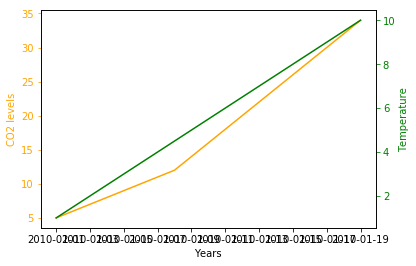

In [70]:
# 6
def plot_timeseries(ax, x, y, color, xlabel, ylabel):
    ax.plot(x, y, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, color=color)
    ax.tick_params('y', colors=color)
    
fig3, ax3 = plt.subplots()
plot_timeseries(ax3, data.index, data['co2'], 'orange', 'Years', 'CO2 levels')
ax4 = ax3.twinx()
plot_timeseries(ax4, data.index, data['temp'], 'green', 'Years', 'Temperature')
plt.show()

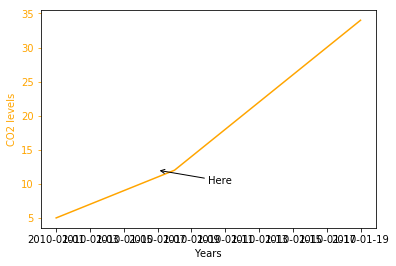

In [80]:
# 7, 8
fig4, ax5 = plt.subplots()
plot_timeseries(ax5, data.index, data['co2'], 'orange', 'Years', 'CO2 levels')
ax5.annotate('Here', xy=(pd.Timestamp('2010-01-7'), 12), xytext=(pd.Timestamp('2010-01-10'), 10),
             arrowprops={'arrowstyle': '->', 'color': 'black'})
plt.show()